<a href="https://colab.research.google.com/github/Beowoulfk/ML/blob/main/SVM(Maquinas%20de%20soporte%20vectorial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, learning_curve


In [ ]:
 url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data'

In [ ]:
dataset = pd.read_csv(url)
dataset.columns = ['top-left-square', 'top-middle-square', 'top-right-square', 'middle-left-square', 'middle-middle-square', 'middle-right-square', 'bottom-left-square', 'bottom-middle-square', 'bottom-right-square', 'Class']
dataset.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


In [ ]:
dataset2 = dataset.replace({'x':1, 'o':0, 'b': 2, 'positive': 1, 'negative':0})

X = dataset2.iloc[:, :-1]
Y = dataset2.iloc[:,-1]
x = X.values
y = Y.values


In [ ]:
##SVM

seed = np.random.seed(0)

xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.10, random_state = 0)
st_x= StandardScaler()
x_train = st_x.fit_transform(xtrain)
x_test = st_x.fit_transform(xtest)

svm_clf = SVC(kernel='linear',random_state= 0)
svm_clf.fit(x_train,ytrain)

SVC(kernel='linear', random_state=0)

In [ ]:
ypred = svm_clf.predict(x_test)
ypred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(f"""Matriz de confusion :
{confusion_matrix(ytest,ypred) } """ + '\n')

print(f"""Reporte de desempeño:
{classification_report(ytest,ypred)}""")

Matriz de confusion :  
[[26 14]
 [ 5 51]] 

Reporte de desempeño: 
              precision    recall  f1-score   support

           0       0.84      0.65      0.73        40
           1       0.78      0.91      0.84        56

    accuracy                           0.80        96
   macro avg       0.81      0.78      0.79        96
weighted avg       0.81      0.80      0.80        96



In [ ]:
#polinomial
svc_clf_poly = SVC(kernel='poly', degree=4)
svc_clf_poly.fit(x_train, ytrain)

SVC(degree=4, kernel='poly')

In [ ]:
y_pred_poly = svc_clf_poly.predict(x_test)

In [ ]:
print(f"""Matriz de confusion :
{confusion_matrix(ytest,y_pred_poly) }""" + '\n')
print(f"""Reporte de desempeño:
{classification_report(ytest,y_pred_poly)}""")

Matriz de confusion :  
[[18 22]
 [ 1 55]]

Reporte de desempeño: 
              precision    recall  f1-score   support

           0       0.95      0.45      0.61        40
           1       0.71      0.98      0.83        56

    accuracy                           0.76        96
   macro avg       0.83      0.72      0.72        96
weighted avg       0.81      0.76      0.74        96



In [ ]:
svc_clf_gaussian = SVC(kernel='rbf')
svc_clf_gaussian.fit(x_train, ytrain)

SVC()

In [ ]:
y_pred_gaussian = svc_clf_gaussian.predict(x_test)

In [ ]:
print(f"""Matriz de confusion :
{confusion_matrix(ytest,y_pred_gaussian) }""" + '\n')
print(f"""Reporte de desempeño:
{classification_report(ytest,y_pred_gaussian)}""")

Matriz de confusion :  
[[37  3]
 [ 2 54]]

Reporte de desempeño: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        40
           1       0.95      0.96      0.96        56

    accuracy                           0.95        96
   macro avg       0.95      0.94      0.95        96
weighted avg       0.95      0.95      0.95        96



In [ ]:
y_train_pred_linear= cross_val_predict(svm_clf, xtrain, ytrain, cv=3)
fpr_svm_linear, tpr_svm_linear, thresholds_linear = roc_curve(ytrain, y_train_pred_linear)
#ply
y_train_pred_poly = cross_val_predict(svc_clf_poly, xtrain, ytrain, cv=3)
fpr_poly, tpr_poly, thresholds_poly = roc_curve(ytrain,y_train_pred_poly)
#gaussian
y_train_pred_gaussian = cross_val_predict(svc_clf_gaussian, xtrain, ytrain, cv=3)
fpr_gaussian, tpr_gaussian, thresholds_gausian = roc_curve(ytrain,y_train_pred_gaussian)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.grid(True)

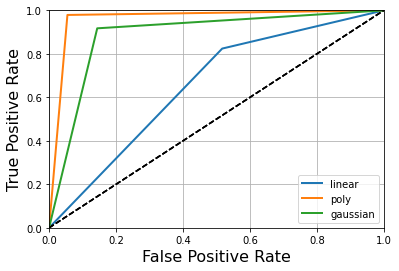

In [ ]:
plot_roc_curve(fpr_svm_linear, tpr_svm_linear,  label="linear")
plot_roc_curve(fpr_poly,  tpr_poly, label= "poly")
plot_roc_curve(fpr_gaussian, tpr_gaussian,  label = "gaussian")

plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [ ]:
# learning curves
def plot_learning_curves(model, x, y):
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.01, random_state=10)
    train_errors, val_errors = [], []
    for m in range(2, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="best", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

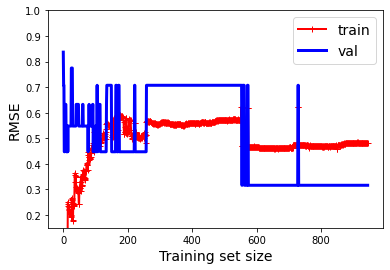

In [ ]:
plt.ylim(0.15)
linear = SVC(kernel='linear',C=0.8,random_state= 0)
plot_learning_curves(linear,X,y)
plt.show()

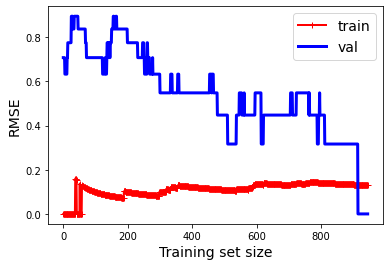

In [ ]:
smv_poly = SVC(kernel='poly', degree=8)
plot_learning_curves(smv_poly,X,y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [ ]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(figsize=(15, 5))

    plt.title(title)
    if ylim is not None:
        plt.set_ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.legend(loc="best")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

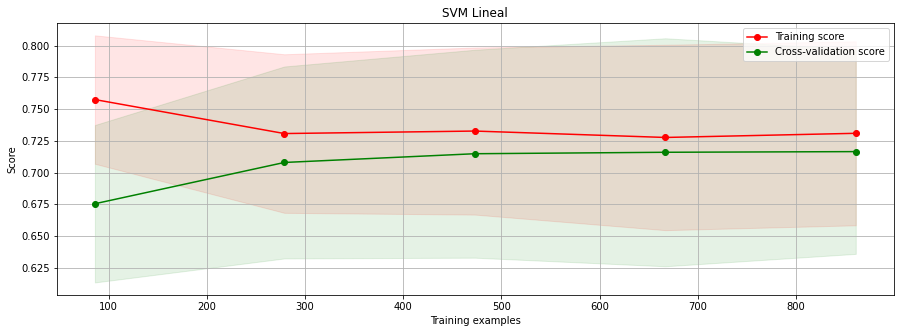

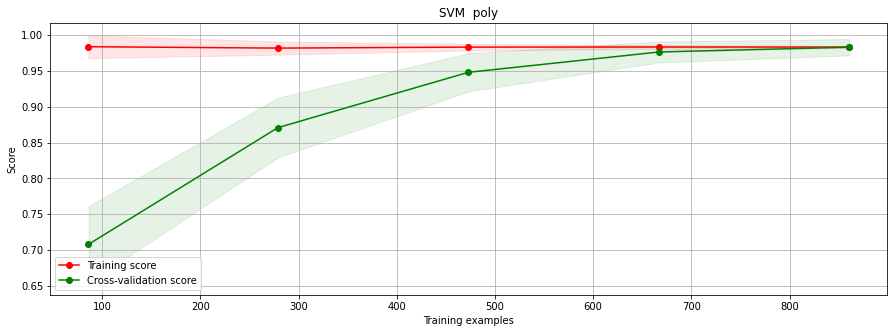

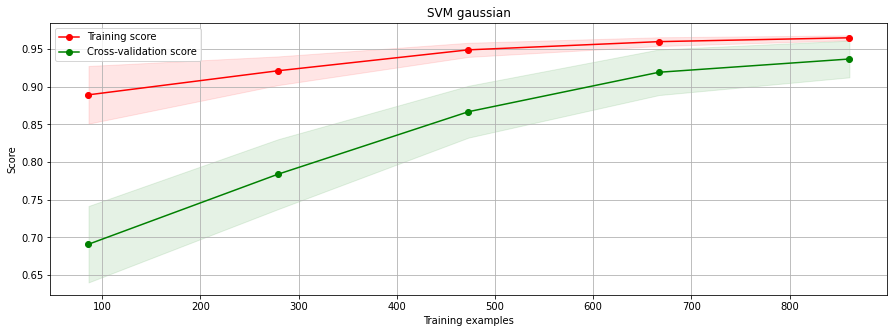

In [ ]:
title='SVM Lineal'
cv = ShuffleSplit(n_splits=100, test_size=0.10, random_state=0)
linear = SVC(kernel='linear',random_state= 0)
plot_learning_curve(linear,title,x,y, cv=cv)


title='SVM  poly'
cv = ShuffleSplit(n_splits=100, test_size=0.10, random_state=0)
poly = SVC(kernel='poly', degree=4)
plot_learning_curve(poly ,title,x,y, cv=cv)

title='SVM gaussian'
cv = ShuffleSplit(n_splits=100, test_size=0.10, random_state=0)
linear = SVC(kernel='rbf')
plot_learning_curve(linear,title,x,y, cv=cv)
